<a href="https://colab.research.google.com/github/faith4hub/Exploratory_Data_Analysis/blob/main/Skincare_Product_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**1.1. Import Libraries**

In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union
import warnings

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy  # (for nlp)
import seaborn as sns
import nltk
import tqdm
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("vader_lexicon")

#model evaluation & Data preperation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import joblib

warnings.filterwarnings("ignore")


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


###**1.2. Data Loading**

In [2]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    NB: Supported formats are 'csv' and 'parquet'.

    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ',', '\t', etc

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of data: {data.shape}\n")
    return data

In [3]:
# Load data
df = load_data(filename="Ulta Skincare Reviews.csv")

df.head(3)

Shape of data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


###**1.3. Data Cleaning and Preprocessing**

In [4]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [5]:
#check for missing values
df.isnull().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [6]:
#drop rows with missing values
df.dropna(inplace=True)              
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4147 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4147 non-null   object
 3   Review_Date       4147 non-null   object
 4   Review_Location   4147 non-null   object
 5   Review_Upvotes    4147 non-null   int64 
 6   Review_Downvotes  4147 non-null   int64 
 7   Product           4147 non-null   object
 8   Brand             4147 non-null   object
 9   Scrape_Date       4147 non-null   object
dtypes: int64(2), object(8)
memory usage: 356.4+ KB


In [7]:
#check the number(s) of each column
print ("\nThe Unique values of the dataset :  \n",df.nunique())


The Unique values of the dataset :  
 Review_Title        2825
Review_Text         3660
Verified_Buyer         2
Review_Date           41
Review_Location     1423
Review_Upvotes        23
Review_Downvotes      15
Product                4
Brand                  1
Scrape_Date            1
dtype: int64


In [8]:
#drop duplicates reviews but first convert the review column to lowercase
df['Review_Text']=df['Review_Text']. apply(str. lower) 
df.drop_duplicates(subset='Review_Text', keep='first', inplace=True, ignore_index=True)
df.info() #to confirm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      3651 non-null   object
 1   Review_Text       3651 non-null   object
 2   Verified_Buyer    3651 non-null   object
 3   Review_Date       3651 non-null   object
 4   Review_Location   3651 non-null   object
 5   Review_Upvotes    3651 non-null   int64 
 6   Review_Downvotes  3651 non-null   int64 
 7   Product           3651 non-null   object
 8   Brand             3651 non-null   object
 9   Scrape_Date       3651 non-null   object
dtypes: int64(2), object(8)
memory usage: 285.4+ KB


In [9]:
#drop columns
print ("Shape before" ,df.shape) 
df.drop(['Scrape_Date', 'Brand','Review_Location','Review_Date','Review_Title','Review_Upvotes','Review_Downvotes'], axis="columns", inplace=True)
print ("Shape after" ,df.shape) #to inspect if successful

Shape before (3651, 10)
Shape after (3651, 3)


In [10]:
#create copies 
df1= df.copy()
df2= df.copy()
df3=df.copy()
df4= df.copy()

In [11]:
#add new column called No to the df1
df1.insert(0, 'No', range(1, 1 + len(df1)))

###**1.4. Using pie chart visualization to gain more insights about the reviews**

In [12]:
SIA = SentimentIntensityAnalyzer()
#using SIA on the Review_text column
res = {}
for i, row in df1.iterrows():
    prep_test = row['Review_Text']
    num = row['No']
    res[num] = SIA.polarity_scores(prep_test)
vads= pd.DataFrame(res).T #create a new dataframe thats holds values of the review
vads= vads.reset_index().rename(columns={'index': 'No'})
#merge the vads with df1
df1= df1.merge(vads, how='left')
#create a new column that analyse the compound value of each review
def getAnalysis(value):
 if value >= 0.05:
  return 'Positive'
 elif value > -0.05:
  return 'Neutral'
 else:
  return 'Negative'
df1['Analysis'] = df1['compound'].apply(getAnalysis)

In [13]:
df1['Analysis'].value_counts()

Positive    3219
Negative     219
Neutral      213
Name: Analysis, dtype: int64

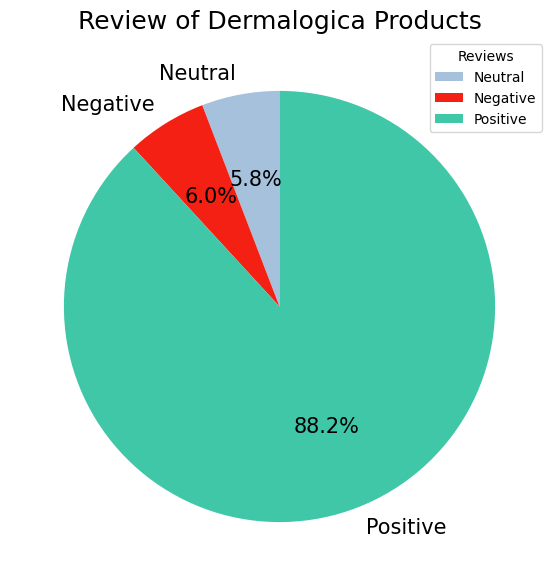

In [14]:
#slice the df1 to form a new dataframe with specific columns
dq= df1[["Analysis", "No"]] 
#group the sliced dataframe based on the unique values of Analysis column and count
hello=dq.groupby('Analysis').count()
#rename
hello.rename(columns = {'No': 'Count'},inplace = True)

hello_1=hello.reset_index()
#labels
yes=hello.Count.sort_values().index
Analysis= hello.Count.sort_values()
plt.figure(figsize=(12, 7))
#plot 
plt.pie(Analysis, labels=yes, colors=['#A5C1DC','#F32013', '#3fc7a8'], autopct='%1.1f%%', textprops={'fontsize':15}, startangle=90)
plt.title(f"Review of Dermalogica Products", size = 18)
plt.legend(title='Reviews');


Text(0.5, 1.0, 'Multi-Vitamin Thermafoliant Review')

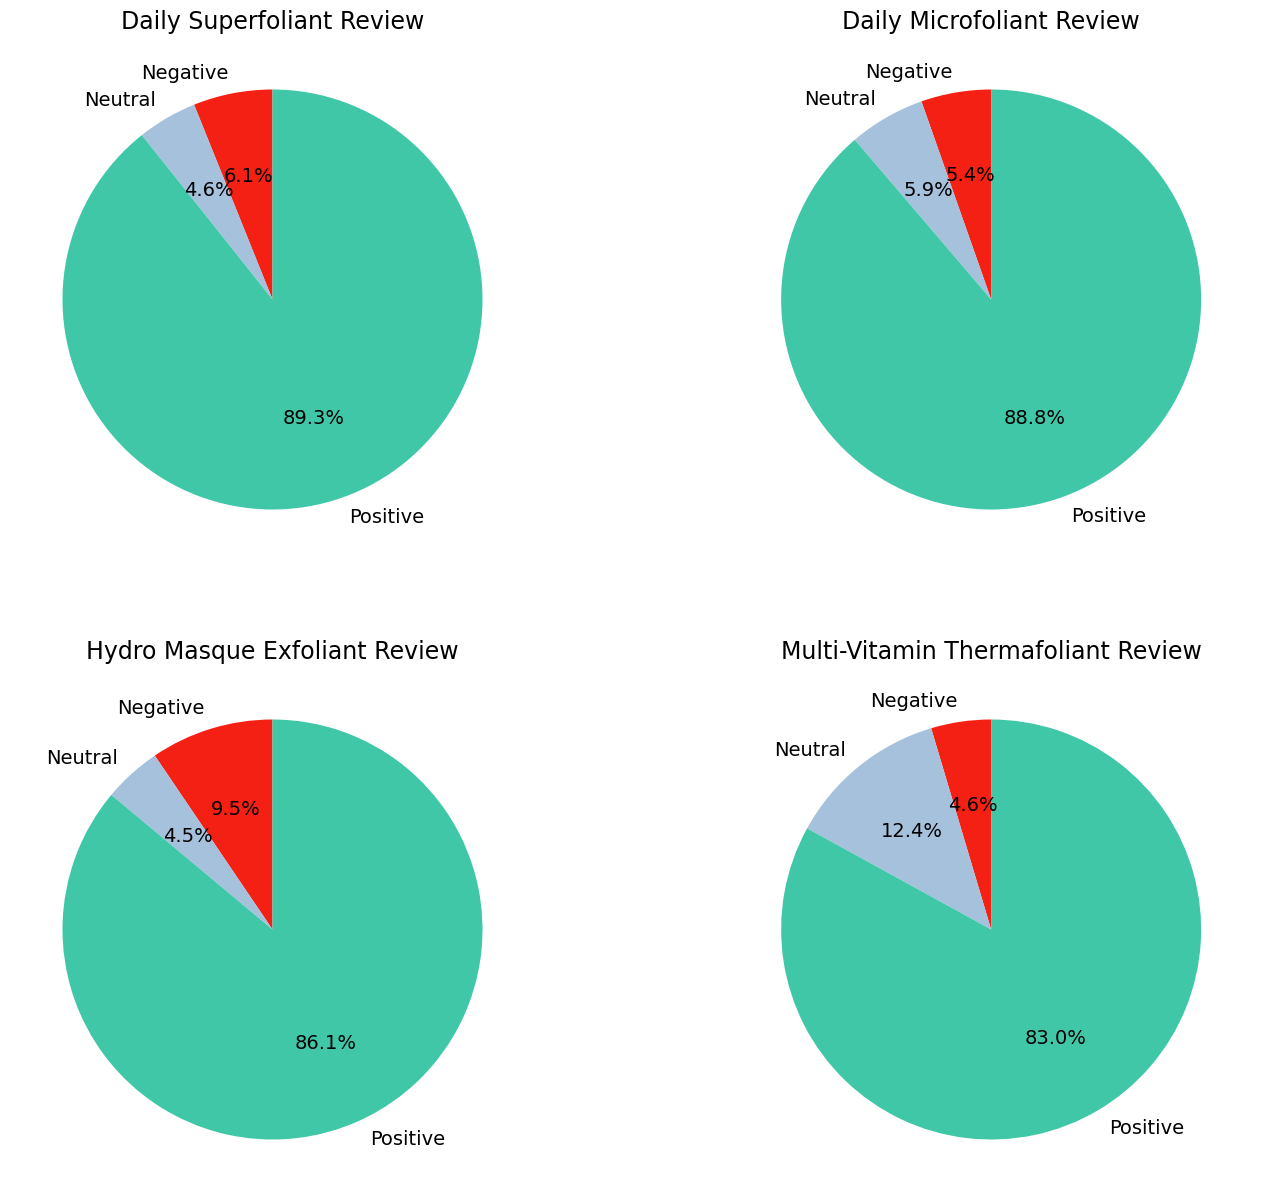

In [15]:
at=df1.groupby(['Product','Analysis'],as_index=False)['No'].count()
at['Count']=at['No']
at.drop('No',axis=1,inplace=True)
plt.rcParams['figure.figsize']=(17,15)
#subplots
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].pie(at[(at['Product']=='Daily Superfoliant')]['Count'],labels=at[(at['Product']=='Daily Superfoliant')]['Analysis'],colors=['#F32013','#A5C1DC', '#3fc7a8'], autopct='%1.1f%%', startangle=90, textprops={'fontsize':14} )
ax[0,0].set_title('Daily Superfoliant Review', fontsize=17)
ax[0,1].pie(at[(at['Product']=='Daily Microfoliant')]['Count'],labels=at[(at['Product']=='Daily Microfoliant')]['Analysis'],colors=['#F32013','#A5C1DC', '#3fc7a8'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':14} )
ax[0,1].set_title('Daily Microfoliant Review', fontsize=17)
ax[1,0].pie(at[(at['Product']=='Hydro Masque Exfoliant')]['Count'],labels=at[(at['Product']=='Hydro Masque Exfoliant')]['Analysis'],colors=['#F32013','#A5C1DC', '#3fc7a8'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':14} )
ax[1,0].set_title('Hydro Masque Exfoliant Review', fontsize=17)
ax[1,1].pie(at[(at['Product']=='Multi-Vitamin Thermafoliant')]['Count'],labels=at[(at['Product']=='Multi-Vitamin Thermafoliant')]['Analysis'],colors=['#F32013','#A5C1DC', '#3fc7a8'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':14} )
ax[1,1].set_title('Multi-Vitamin Thermafoliant Review', fontsize=17)

####From pie-charts, Majority of the reviews of all 4 dermalogica is positive. 

####Hydro Masque Exfoliant has the highest value for negative reviews. However, the total number of review of Hydro Masque Exfoliant is 359.

###**1.5. Find out if most buyers have common skincare issues**



In [16]:
print ("Shape of data: " ,df3.shape)
#create a new dataframe for verified buyers
ver_b=df3.loc[df3['Verified_Buyer'].isin(['Yes'])]
#shape of verified buyers
print ("Shape of verified buyers: " ,ver_b.shape)
#create a new dataframe for verified buyers with common skincare issues
csis = ver_b[ver_b['Review_Text'].str.contains('sunburn|dry|dehydrated|dull|dullness|sensitive|acne|spots|hyperpigmentation|textured|oily|ageing|wrinkles|combination|blackheads|pores')]
#shape 
print ("Shape of buyers with common skin issues: " ,csis.shape)

Shape of data:  (3651, 3)
Shape of verified buyers:  (1217, 3)
Shape of buyers with common skin issues:  (349, 3)


#### Most buyers don't have common skin care issues. A lot of buyers didnt specify the skin issues in their reviews. 

###**1.6. Issues did the products help solve or exacerbate**

####Judging from the review evaluation, the products help solve skincare issues. They reviews for solving skincare issues are higher, The issues are Sensitive, Dry, Dull, Dehydrated, Acne Skin.

###**1.7. Word Cloud for the Unique Products**

In [17]:
#slice the dataset based on the four skincare products
a = df4[df4['Product']=='Daily Superfoliant']
b = df4[df4['Product']=='Daily Microfoliant']
c = df4[df4['Product']=='Hydro Masque Exfoliant']
d = df4[df4['Product']=='Multi-Vitamin Thermafoliant']

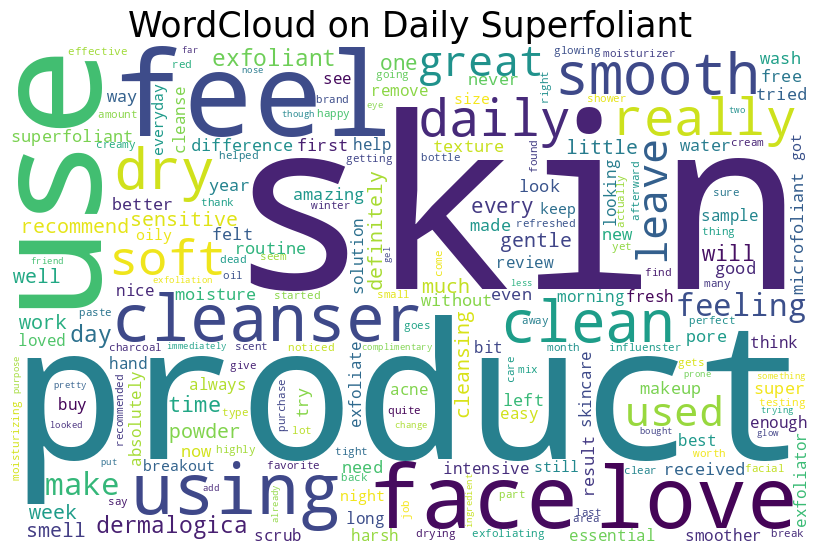

In [18]:
#create a word cloud on Daily Superfoliant
# Extract text data from a column
text_data = ' '.join(a['Review_Text'])

# Clean text data (example using lowercasing and removing stopwords)
stopwords = set(['english','go']) # define stopwords
text_data_cleaned = ' '.join([word.lower() for word in text_data.split() if word.lower() not in stopwords])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white',random_state=1, collocations=False).generate(text_data_cleaned)

# Display the word cloud
plt.figure(figsize=(8, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title(size=25,label="WordCloud on Daily Superfoliant")
plt.show()

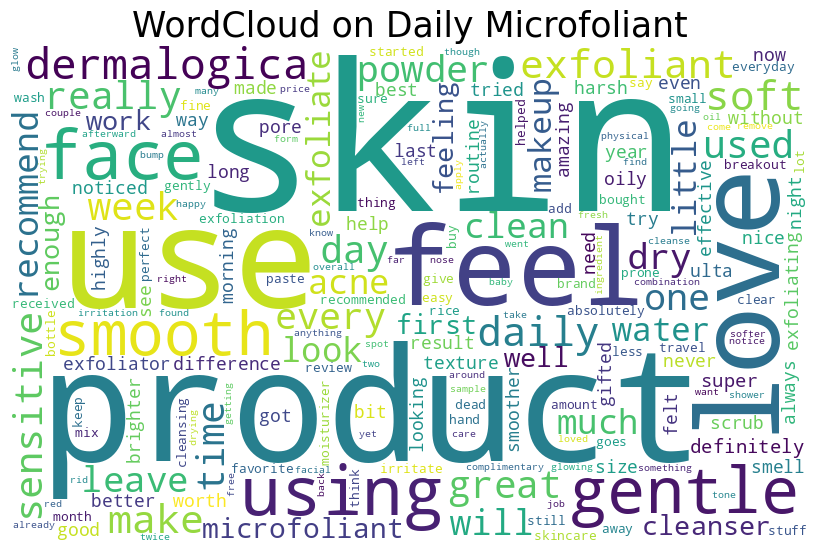

In [19]:
#create word cloud for Daily Microfoliant
# Extract text data from a column
text_data = ' '.join(b['Review_Text'])

# Clean text data (example using lowercasing and removing stopwords)
stopwords = set(['english','go']) # define stopwords
text_data_cleanedd = ' '.join([word.lower() for word in text_data.split() if word.lower() not in stopwords])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white',collocations=False).generate(text_data_cleanedd)

# Display the word cloud
plt.figure(figsize=(8, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title(size=25,label="WordCloud on Daily Microfoliant")
plt.show()


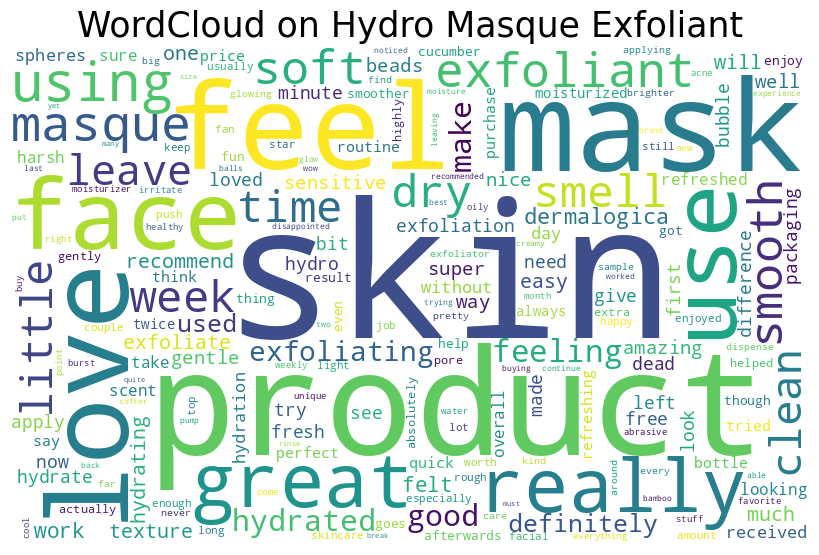

In [20]:
#create word cloud for Hydro Masque Exfoliant
# Extract text data from a column
text_data = ' '.join(c['Review_Text'])

# Clean text data (example using lowercasing and removing stopwords)
stopwords = set(['english','go']) # define stopwords
text_data_cleanedy = ' '.join([word.lower() for word in text_data.split() if word.lower() not in stopwords])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white', collocations=False).generate(text_data_cleanedy)

# Display the word cloud
plt.figure(figsize=(8, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title(size=25,label="WordCloud on Hydro Masque Exfoliant")
plt.show()

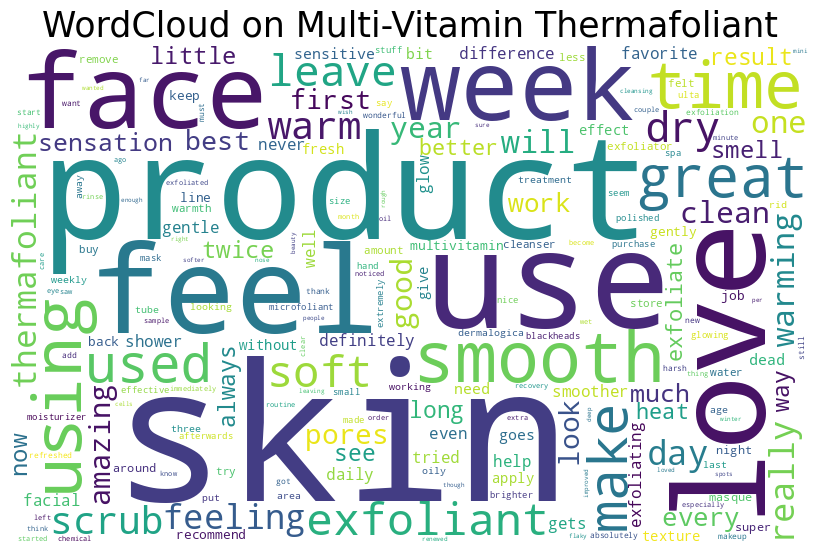

In [21]:
#create word cloud for Multi-Vitamin Thermafoliant
# Extract text data from a column
text_data = ' '.join(d['Review_Text'])

# Clean text data (example using lowercasing and removing stopwords)
stopwords = set(['english','dermalogica', 'go']) # define stopwords
text_data_cleanedx = ' '.join([word.lower() for word in text_data.split() if word.lower() not in stopwords])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white',collocations=False).generate(text_data_cleanedx)

# Display the word cloud
plt.figure(figsize=(8, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title(size=25,label="WordCloud on Multi-Vitamin Thermafoliant")
plt.show()

###**1.8. Sentiment Analysis**

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
# Define the preprocess_text function
def preprocess_text(text):
    """
    Preprocess a piece of text by performing the following steps:
    - Remove stopwords
    - Tokenize
    - Stem words
    - Join back into a string
    """
    words = word_tokenize(text) # Tokenize
    words = [word for word in words if word not in stopwords.words('english')] # Remove stopwords
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words] # Stem words
    preprocessed_text = ' '.join(words) # Join back into a string
    return preprocessed_text

# Define the sentiment analysis function using vaderSentiment
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    return 'positive' if compound_score >= 0.05 else 'negative' if compound_score <= -0.05 else 'neutral'

# Apply the preprocess_text function to the 'text' column of the dataframe
df2['preprocessed_text'] = df2['Review_Text'].apply(preprocess_text)

# Apply the get_sentiment function to the 'preprocessed_text' column of the dataframe
df2['sentiment'] = df2['preprocessed_text'].apply(get_sentiment)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
#create a new column that specify sentiment values;positive as 0,negative as 1 and neutral as 2
df2.loc[df2['sentiment'] == 'positive', 'num'] = 0 
df2.loc[df2['sentiment'] == 'negative', 'num'] = 1
df2.loc[df2['sentiment'] == 'neutral', 'num'] = 2
#convert float to int
df2['num'] = df2['num'].apply(np.int64)

###**1.8. Build Model**

In [26]:
#split data
X = df2.drop(['preprocessed_text','sentiment','num'],axis=1)
y = df2.num
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [27]:
y_train.value_counts()

0    2297
2     287
1     154
Name: num, dtype: int64

#### The target feature (df.sentiment) has an imbalanced class where one of the class (positive) has 3,000 plus inputs and the others are less than than 400 input. Normally when there imbalanced class, it is adviced that other metrics such ROC AUC score, f1 score, precision test etc be used to measure the accuracy of the model built. 

#### But this class is grossly imbalanced and models will not work as well and be incomplete without performing data balancing on train data. We will be solving this by undersampling.

In [28]:
#fixing imbalanced class by undersampling
X_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 150, 1:150 , 2: 150},random_state=14)

In [29]:
#positive as 0,negative as 1 and neutral as 2
df2['num'].value_counts() 

0    3061
2     389
1     201
Name: num, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score #since our classes is balanced

TEST_SIZE = 0.1
RANDOM_STATE = 14

X = X_train_1["Review_Text"]
y = y_train_1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)


# Extract features using a bag-of-words model
vectorizer = CountVectorizer(stop_words='english')
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_test)

# Train a Naive Bayes classifier on the training data
clf = MultinomialNB()
clf.fit(X_tr, y_train)

# Evaluate the model on the testing data
y_pred = clf.predict(X_val)
Auc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(round(Auc, 2)))


Accuracy: 0.73


###**2.0. Pipeline**

In [31]:
from sklearn.pipeline import make_pipeline
import joblib

# Create a pipeline with CountVectorizer and SVM
text_pipeline = make_pipeline(CountVectorizer(), MultinomialNB())

# Fit the pipeline on the training data
text_pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = text_pipeline.predict(X_test)

# Evaluate the pipeline's performance
accuracy = text_pipeline.score(X_test, y_test)
accuracy

0.6666666666666666

In [32]:
# Save the pipeline to disk
joblib.dump(text_pipeline, 'text_classification_model.pkl')

# Load the pipeline from disk
text_classification_model = joblib.load('text_classification_model.pkl')
# Make predictions using the loaded model
y_preda = text_classification_model.predict(X_test)

###**2.1. Testing Model**

In [33]:
#test the model
#where positive is 0,negative is 1 and neutral is 2
text = ['i hate this product, terrible']
text_classification_model.predict(text)

array([1])

In [34]:
test = ['makes my skin smoother, amazing']
text_classification_model.predict(test)

array([2])

In [35]:
tesst = ['i cant stop talking about this product. I love it so much']
text_classification_model.predict(tesst)

array([0])